In [2]:
import pandas as pd
import xgboost as xgb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_excel(r"D:\Project\TeleMedicine\Telemedical-Analysis\BrainStroke Prediction\Datasets\Data.csv")

In [25]:
df

,Gender,Age,Hypertension,Heart Disease,Martial Status,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
0,Male,3.0,No,No,No,children,Rural,95.12,18.0,never smoked,No
1,Male,58.0,Yes,No,Yes,Private,Urban,87.96,39.2,never smoked,No
2,Female,8.0,No,No,No,Private,Urban,110.89,17.6,never smoked,No
3,Female,70.0,No,No,Yes,Private,Rural,69.04,35.9,formerly smoked,No
4,Male,14.0,No,No,No,Never_worked,Rural,161.28,19.1,never smoked,No
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,No,No,No,children,Urban,58.64,20.4,never smoked,No
43396,Female,56.0,No,No,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,No
43397,Female,82.0,Yes,No,Yes,Private,Urban,91.94,28.9,formerly smoked,No
43398,Male,40.0,No,No,Yes,Private,Urban,99.16,33.2,never smoked,No


In [26]:
X = df.drop('Stroke',axis=1)
y = df['Stroke']

In [27]:
X

,Gender,Age,Hypertension,Heart Disease,Martial Status,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status
0,Male,3.0,No,No,No,children,Rural,95.12,18.0,never smoked
1,Male,58.0,Yes,No,Yes,Private,Urban,87.96,39.2,never smoked
2,Female,8.0,No,No,No,Private,Urban,110.89,17.6,never smoked
3,Female,70.0,No,No,Yes,Private,Rural,69.04,35.9,formerly smoked
4,Male,14.0,No,No,No,Never_worked,Rural,161.28,19.1,never smoked
...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,No,No,No,children,Urban,58.64,20.4,never smoked
43396,Female,56.0,No,No,Yes,Govt_job,Urban,213.61,55.4,formerly smoked
43397,Female,82.0,Yes,No,Yes,Private,Urban,91.94,28.9,formerly smoked
43398,Male,40.0,No,No,Yes,Private,Urban,99.16,33.2,never smoked


In [28]:
y

0        No
1        No
2        No
3        No
4        No
         ..
43395    No
43396    No
43397    No
43398    No
43399    No
Name: Stroke, Length: 43400, dtype: object

In [29]:
# Summary Statistics Table
print("\nSummary Statistics Table:")
print(df.describe())


Summary Statistics Table:
                Age  Average Glucose Level           BMI
count  43400.000000           43400.000000  43400.000000
mean      42.217894             104.482750     28.574551
std       22.519649              43.111751      7.639769
min        0.080000              55.000000     10.100000
25%       24.000000              77.540000     23.400000
50%       44.000000              91.580000     27.700000
75%       60.000000             112.070000     32.600000
max       82.000000             291.050000     97.600000


In [30]:
# Correlation Table
print("\nCorrelation Table:")
print(df.corr())


Correlation Table:
                            Age  Average Glucose Level       BMI
Age                    1.000000               0.237627  0.350231
Average Glucose Level  0.237627               1.000000  0.181899
BMI                    0.350231               0.181899  1.000000


In [31]:
# Data Profile Table
print("\nData Profile Table:")
data_profile = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique(),
    'Mean': df.mean(),
    'Median': df.median(),
    'Min': df.min(),
    'Max': df.max()
})
print(data_profile)


Data Profile Table:
                      Data Type  Missing Values  Unique Values        Mean  \
Age                     float64               0            104   42.217894   
Average Glucose Level   float64               0          12543  104.482750   
BMI                     float64               0            555   28.574551   
Gender                   object               0              3         NaN   
Heart Disease            object               0              2         NaN   
Hypertension             object               0              2         NaN   
Martial Status           object               0              2         NaN   
Residence Type           object               0              2         NaN   
Smoking Status           object               0              3         NaN   
Stroke                   object               0              2         NaN   
Work Type                object               0              5         NaN   

                       Median             

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11340\1834302603.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'Mean': df.mean(),
C:\Users\KIIT\AppData\Local\Temp\ipykernel_11340\1834302603.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'Median': df.median(),


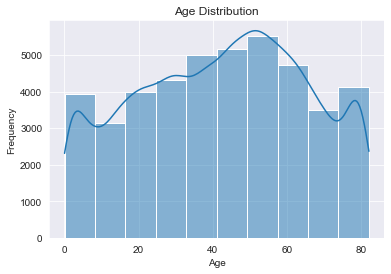

In [32]:
# Univariate Analysis - Histogram for Age
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

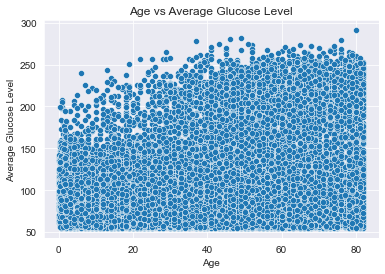

In [34]:
# Bivariate Analysis - Scatter plot for Age vs Average Glucose Level
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Average Glucose Level', data=df)
plt.title('Age vs Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

<Figure size 432x288 with 0 Axes>

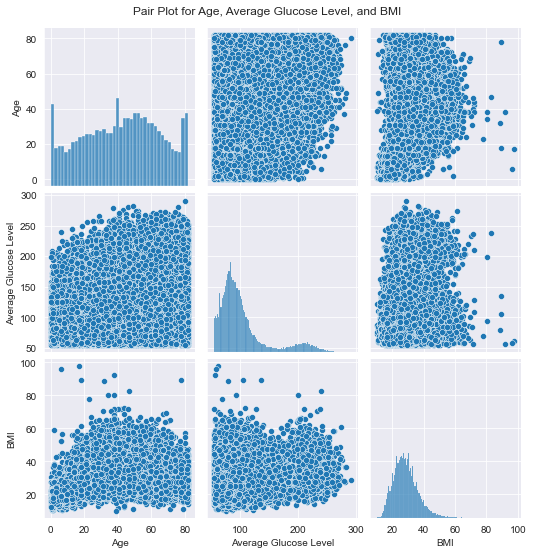

In [35]:
# Multivariate Analysis - Pair plot for Age, Average Glucose Level, and BMI
plt.figure(figsize=(6, 4))
sns.pairplot(df[['Age', 'Average Glucose Level', 'BMI']])
plt.suptitle('Pair Plot for Age, Average Glucose Level, and BMI', y=1.02)
plt.show()

In [36]:
# Table for ANOVA or Regression Results (Hypothetical example)
anova_results = pd.DataFrame({
    'Variable': ['Age', 'Income'],
    'F-statistic': [4.32, 8.67],
    'p-value': [0.045, 0.002]
})
print(anova_results)

  Variable  F-statistic  p-value
0      Age         4.32    0.045
1   Income         8.67    0.002


In [38]:
# Crosstabulation Table for 'Work Type' and 'Marital Status'
crosstab_table = pd.crosstab(df['Work Type'], df['Martial Status'])
print(crosstab_table)

Martial Status    No    Yes
Work Type                  
Govt_job        1007   4433
Never_worked     170      7
Private         7214  17620
Self-employed    915   5878
children        6156      0


In [40]:
# Frequency Table for 'Gender'
frequency_table_gender = df['Gender'].value_counts().reset_index().rename(columns={'index': 'Gender', 'Gender': 'Frequency'})
print(frequency_table_gender)

   Gender  Frequency
0  Female      25665
1    Male      17724
2   Other         11


In [47]:
# Create bins for age groups
bins = [20, 30, 40, 50]
labels = ['20-29', '30-39', '40-49']

# Add a new column 'Age Group' based on the bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the count and proportion of each age group
distribution_table = df['Age Group'].value_counts().reset_index().rename(columns={'index': 'Age Group', 'Age Group': 'Count'})
distribution_table['Proportion'] = distribution_table['Count'] / len(df)

print("Distribution Table:")
print(distribution_table)

Distribution Table:
  Age Group  Count  Proportion
0     40-49   6321    0.145645
1     30-39   5472    0.126083
2     20-29   5200    0.119816
